<a href="https://colab.research.google.com/github/FranziskoB/Analise_Fatorial_PCA/blob/main/R_Analise_Fatorial_PCA_Exemplo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análises fatoriais e PCA

Dataset contém dados de indicadores de desenvolvimento de paises em 2 anos distintos. Vai ser criado um ranking apartir dos dados para efeito de comparação entre os resultados obtidos nos dois anos e será verificado se houve alguma mudança no ranking de paises de um ano para o outro.

##Importando bibliotecas

In [ ]:
if(!"kableExtra" %in% installed.packages()){
    install.packages("kableExtra")}
if(!"IRdisplay" %in% installed.packages()){
    install.packages("IRdisplay")}
if(!"htmltools" %in% installed.packages()){
    install.packages("htmltools")}
if(!"corrplot" %in% installed.packages()){
    install.packages("corrplot")}
if(!"reshape2" %in% installed.packages()){
    install.packages("reshape2")} 
if(!"PerformanceAnalytics" %in% installed.packages()){
    install.packages("PerformanceAnalytics")} 
if(!"psych" %in% installed.packages()){
    install.packages("psych")} 
if(!"ltm" %in% installed.packages()){
    install.packages("ltm")} 
if(!"Hmisc" %in% installed.packages()){
    install.packages("Hmisc")} 
if(!"openxlsx" %in% installed.packages()){
    install.packages("openxlsx")} 
if(!"ggrepel" %in% installed.packages()){
    install.packages("ggrepel")} 
library(reshape2)
library(knitr)
library(kableExtra)
library(IRdisplay)
library(corrplot)
library(htmltools)
library(PerformanceAnalytics)
library(psych)
library(Hmisc)
library(ltm)
library(openxlsx)
library(tibble)
library(ggrepel)
library(dplyr)

##Carregamento da base de dados 

In [ ]:
base_indicador= read.xlsx("https://github.com/FranziskoB/Analise_Fatorial_PCA/raw/main/Dados/indicador_pa%C3%ADs.xlsx",sheet=1)

Visualização da base de dados

In [ ]:
head(base_indicador, n=10)

,país,cpi1,violência1,pib_capita1,escol1,cpi2,violência2,pib_capita2,escol2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Argentina,2.9,5.8836,10749.319,9.7,2.9,5.2538,11601.630,9.8
2,Australia,8.7,0.7800,25190.840,11.8,8.7,0.7800,25306.824,11.9
3,Austria,7.9,0.7077,26642.994,11.8,7.9,0.8094,27266.404,11.8
4,Belgium,7.1,1.6349,24550.396,12.0,7.1,1.3524,24733.627,12.1
5,Brazil,3.7,25.0808,4716.614,6.7,3.7,24.4085,4803.398,6.8
6,Canada,8.7,1.6049,25575.217,14.1,8.9,1.7157,25933.289,14.2
7,Chile,6.7,5.2600,6781.696,10.1,7.2,5.7218,7122.939,10.2
8,China,3.6,2.0567,2426.332,7.6,3.5,1.7174,2639.541,7.7
9,Colombia,3.7,50.4671,3218.072,6.5,3.5,41.7733,3362.466,6.6


 Variáveis (1): referem-se ao 1º ano de análise
 
 Variáveis (2): referem-se ao 2º ano de análise

##Estatísticas descritivas

In [ ]:
summary(base_indicador)

     país                cpi1         violência1       pib_capita1     
 Length:50          Min.   :1.900   Min.   : 0.4596   Min.   :  794.8  
 Class :character   1st Qu.:3.525   1st Qu.: 0.8972   1st Qu.: 3994.2  
 Mode  :character   Median :4.950   Median : 1.6167   Median :11546.5  
                    Mean   :5.518   Mean   : 7.0924   Mean   :15091.2  
                    3rd Qu.:7.700   3rd Qu.: 6.4502   3rd Qu.:25362.9  
                    Max.   :9.400   Max.   :70.8475   Max.   :39971.8  
     escol1           cpi2        violência2      pib_capita2     
 Min.   : 6.10   Min.   :2.00   Min.   : 0.435   Min.   :  837.8  
 1st Qu.: 8.20   1st Qu.:3.50   1st Qu.: 0.902   1st Qu.: 4069.7  
 Median :10.60   Median :5.00   Median : 1.656   Median :11651.6  
 Mean   :10.26   Mean   :5.50   Mean   : 6.645   Mean   :15294.0  
 3rd Qu.:12.28   3rd Qu.:7.75   3rd Qu.: 6.134   3rd Qu.:25776.7  
 Max.   :14.10   Max.   :9.30   Max.   :70.847   Max.   :40034.8  
     escol2     
 Min.   : 

## Scatter e ajuste linear entre as variáveis 'escolaridade' e 'pib per capita'

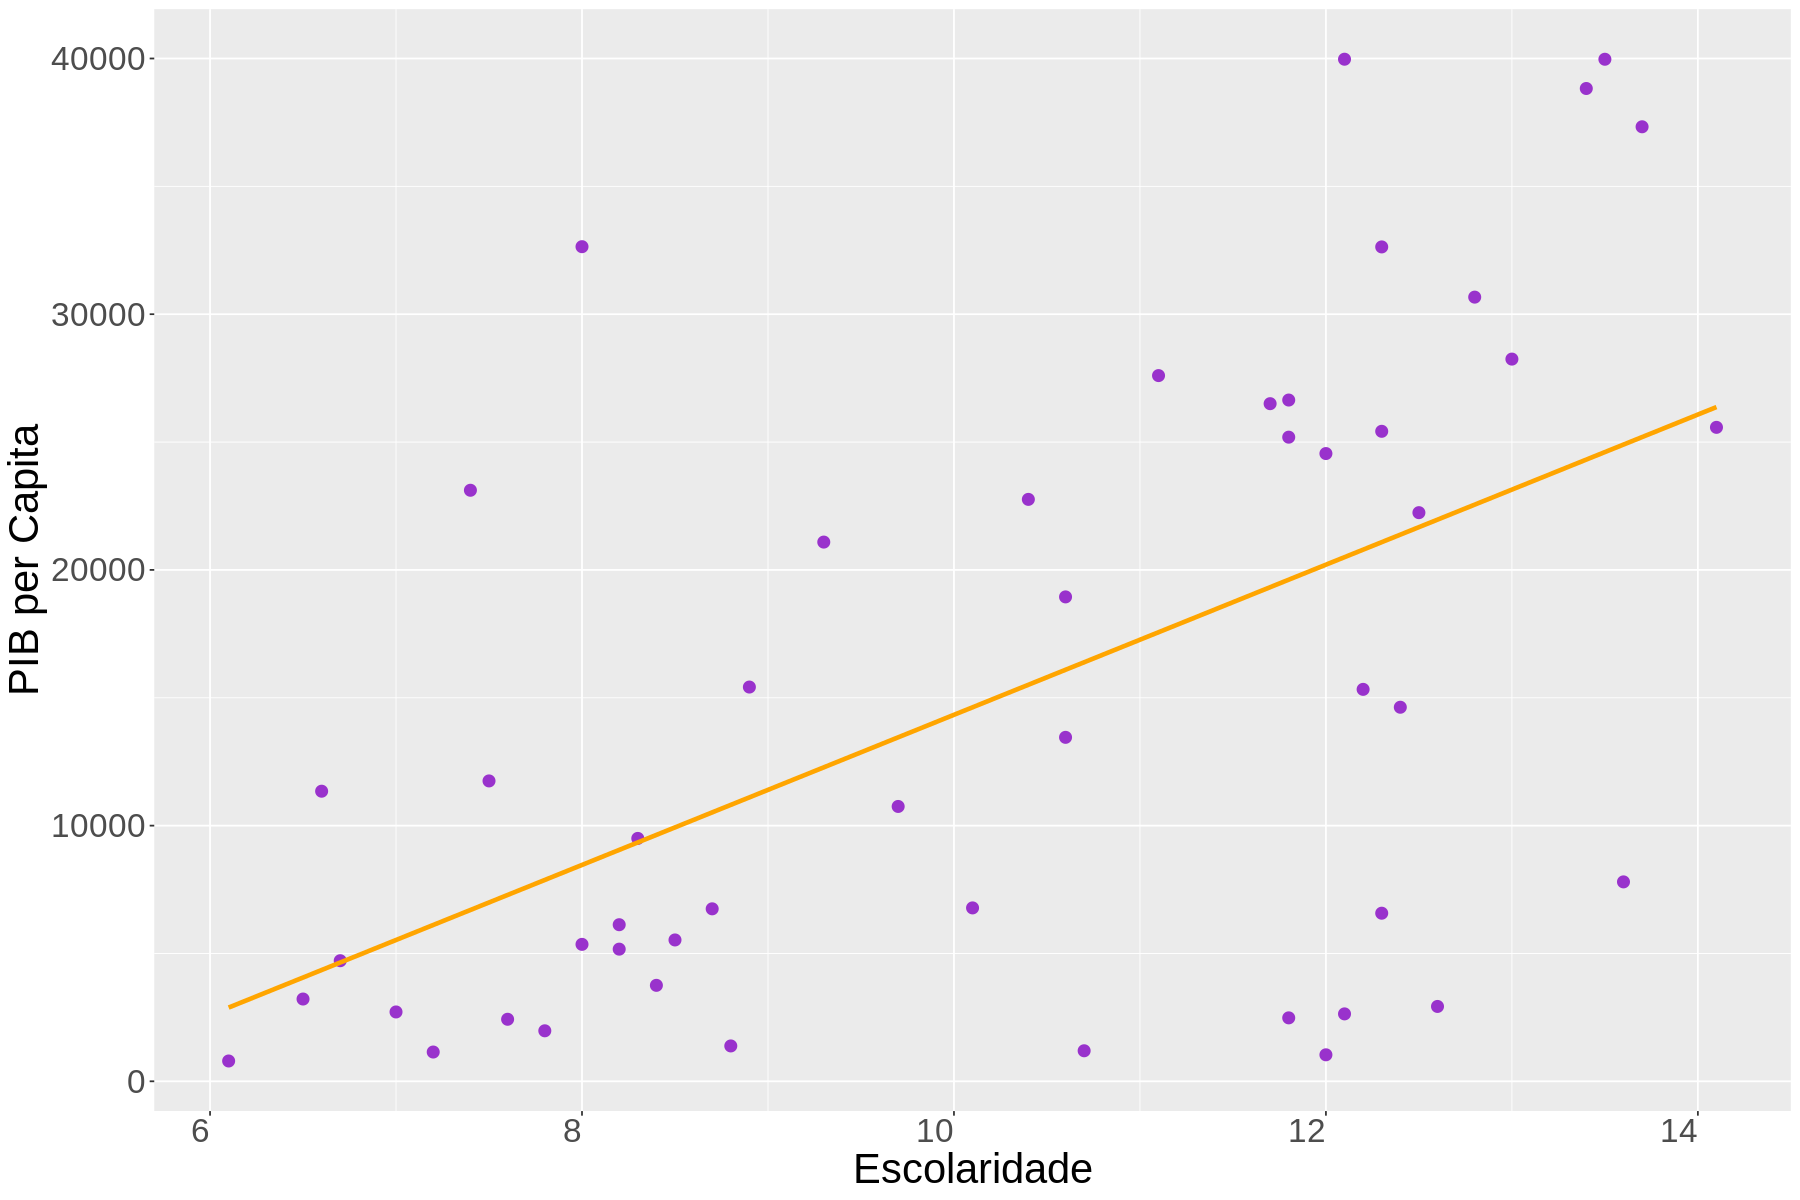

In [ ]:
options(repr.plot.width=15, repr.plot.height=10) #Configuração da largura e altura dos plots
base_indicador %>%
  ggplot() +
  geom_point(aes(x = escol1, y = pib_capita1),
             color = "darkorchid",
             size = 3) +
  geom_smooth(aes(x = escol1, y = pib_capita1),
              color = "orange", 
              method = "lm", 
              formula = y ~ x, 
              se = FALSE,
              size = 1.3) +
  labs(x = "Escolaridade",
       y = "PIB per Capita") +
          theme(text = element_text(size=25),
        axis.text.x = element_text(angle=0, hjust=1))

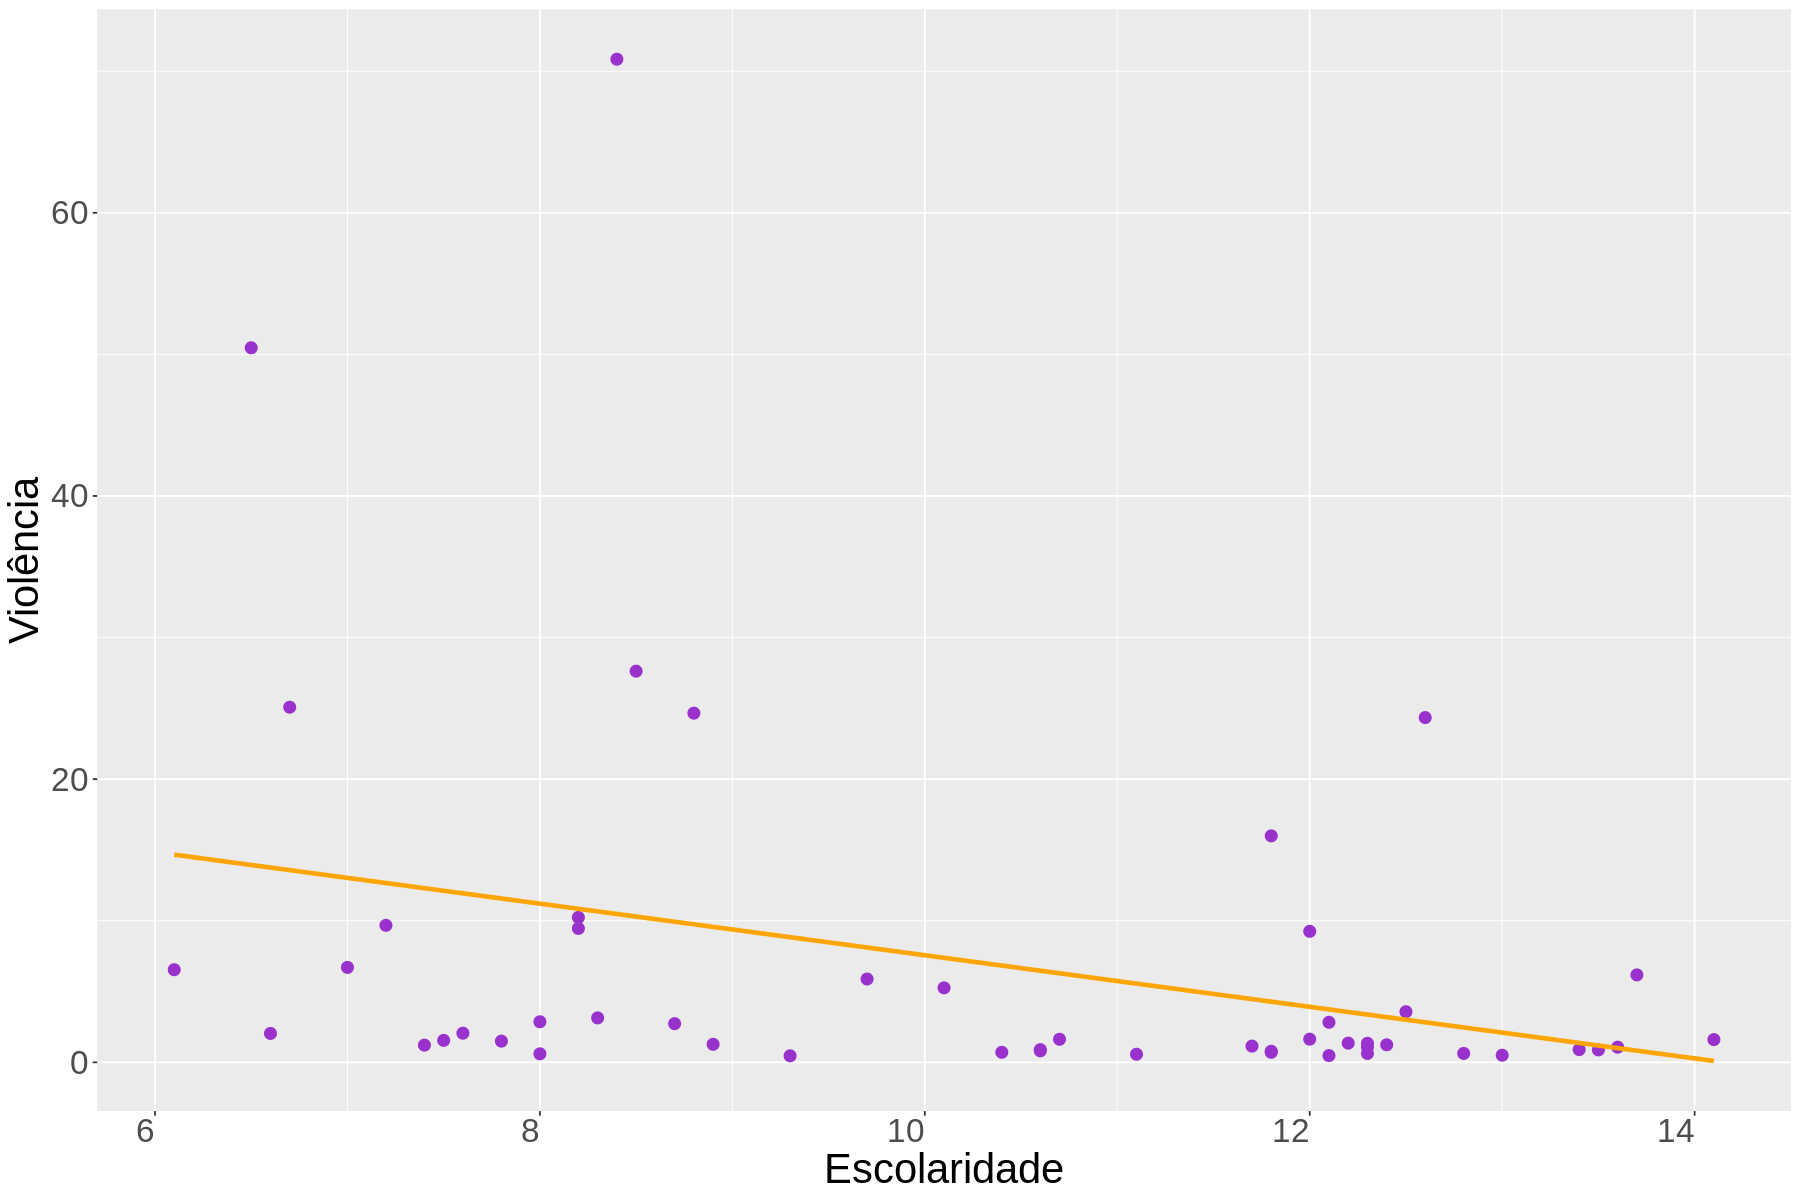

In [ ]:
base_indicador %>%
  ggplot() +
  geom_point(aes(x = escol1, y = violência1),
             color = "darkorchid",
             size = 3) +
  geom_smooth(aes(x = escol1, y = violência1),
              color = "orange", 
              method = "lm", 
              formula = y ~ x, 
              se = FALSE,
              size = 1.3) +
  labs(x = "Escolaridade",
       y = "Violência") +
          theme(text = element_text(size=25),
        axis.text.x = element_text(angle=0, hjust=1))

##Elaboração da Análise Fatorial Por Componentes Principais (1º Ano)

## Matriz de correlações

Coeficientes de correlação de Pearson para cada par de variáveis

In [ ]:
rho1 <- rcorr(as.matrix(base_indicador[,2:5]), type="pearson")

corr_coef1 <- rho1$r # Matriz de correlações
corr_sig1 <- round(rho1$P, 5) # Matriz com p-valor dos coeficientes

Elaboração de um mapa de calor das correlações de Pearson entre as variáveis

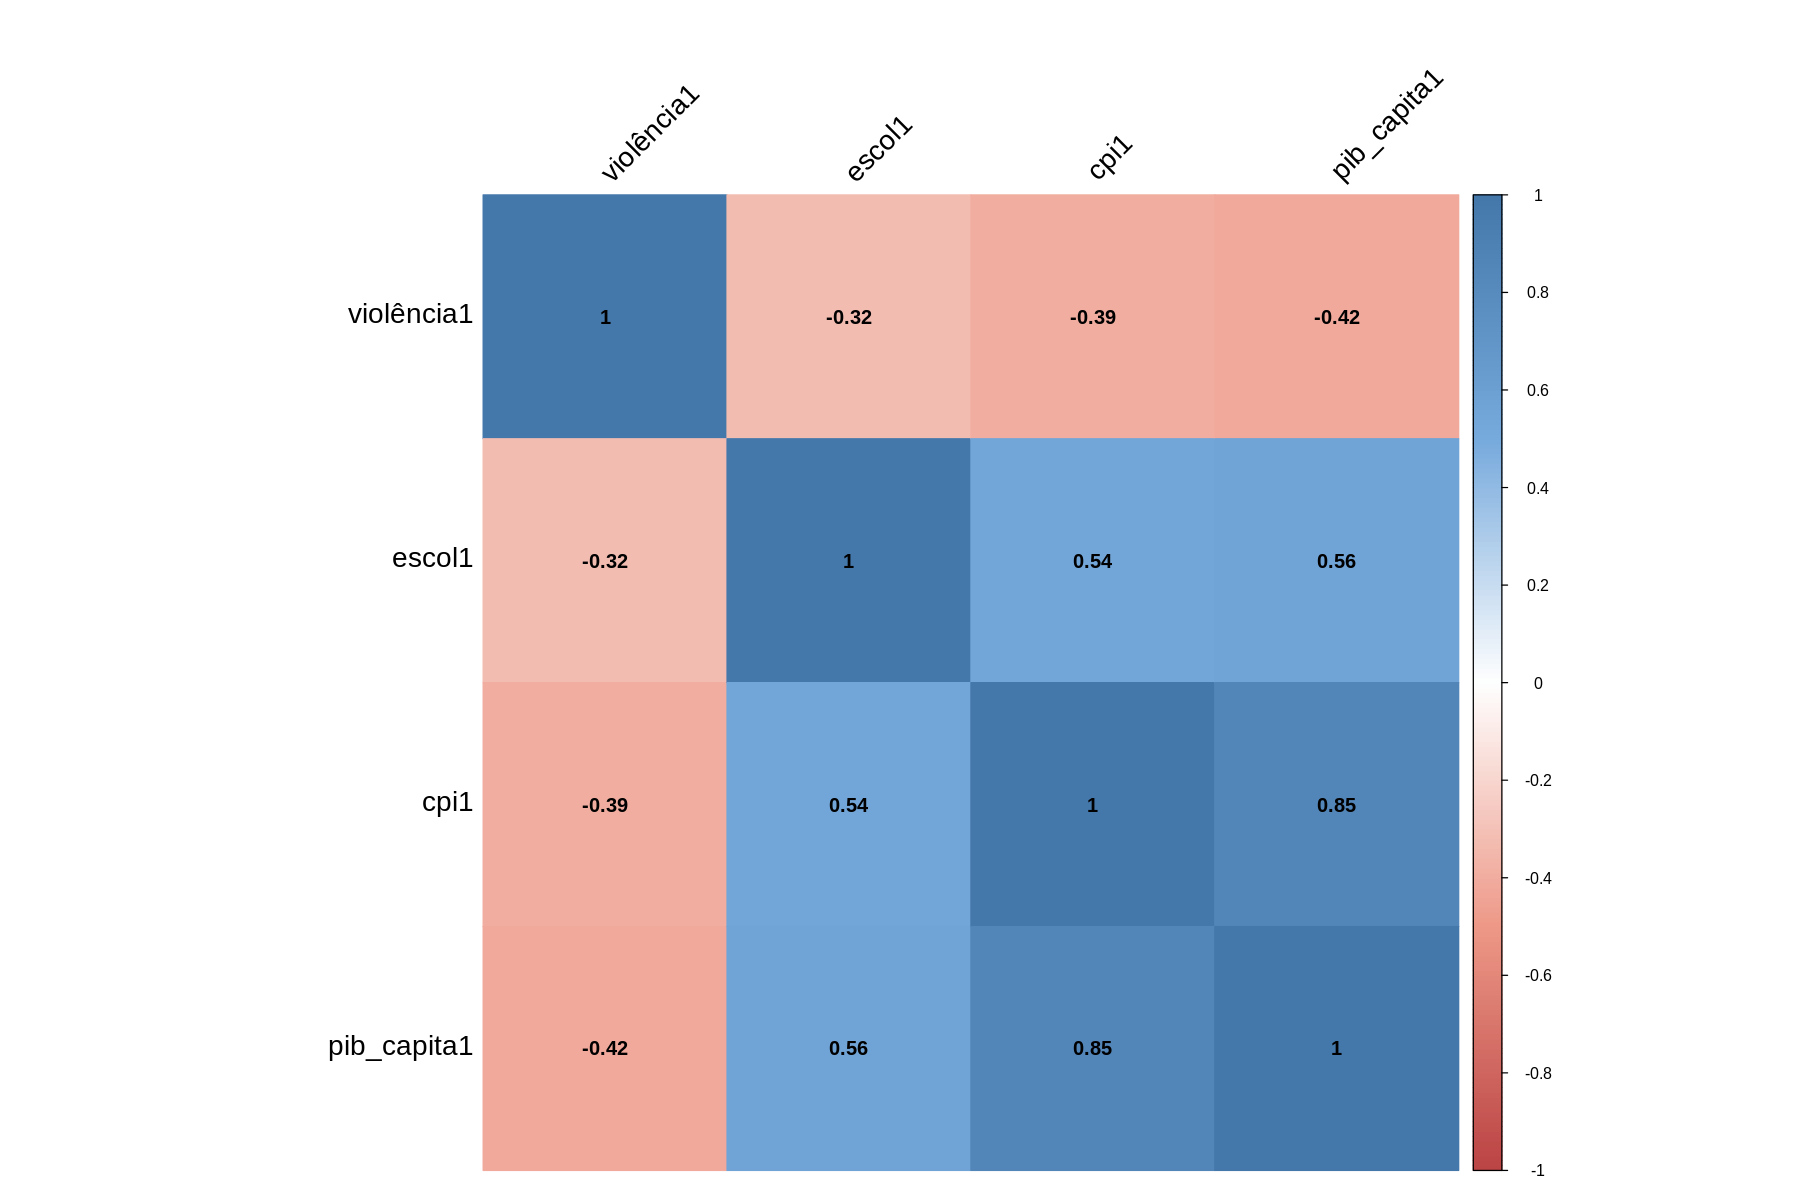

In [ ]:
library(ggplot2)
options(repr.plot.width=15, repr.plot.height=10) #Configuração da largura e altura dos plots
col1 <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
corrplot(corr_coef1, method="color", col=col(200),  
         order="hclust", 
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=45, tl.cex=1.4#Text label color and rotation
         )

Visualização das distribuições das variáveis, scatters, valores das correlações

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”


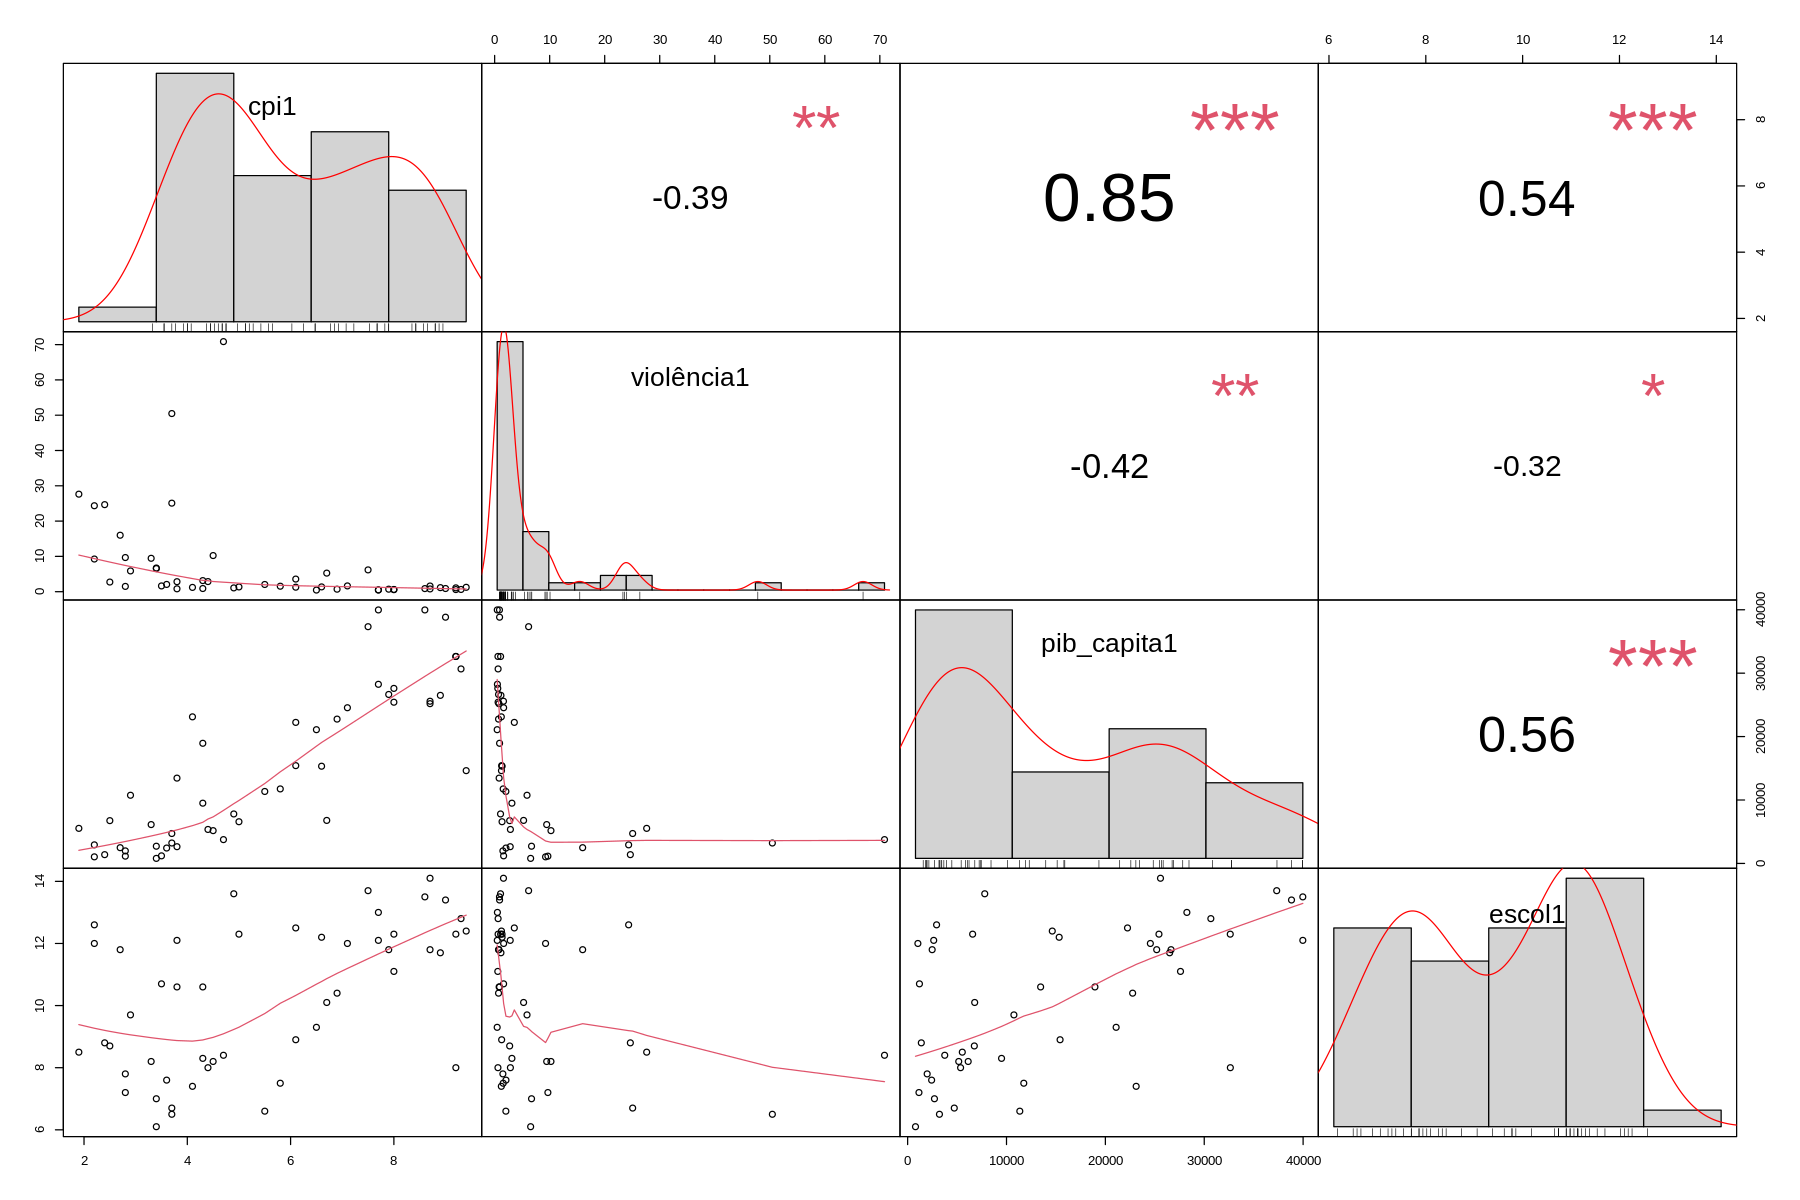

In [ ]:
chart.Correlation(base_indicador[, 2:5], histogram = TRUE, pch = "+")

##Elaboração a Análise Fatorial Por Componentes Principais

Teste de esfericidade de Bartlett

In [ ]:
cortest.bartlett(base_indicador[,2:5])

R was not square, finding R from data



$chisq
[1] 89.63658

$p.value
[1] 3.605109e-17

$df
[1] 6

Elaboração da análise fatorial por componentes principais

In [ ]:
fatorial1 <- principal(base_indicador[,2:5],
                      nfactors = length(base_indicador[,2:5]),
                      rotate = "none",
                      scores = TRUE)
fatorial1

Principal Components Analysis
Call: principal(r = base_indicador[, 2:5], nfactors = length(base_indicador[, 
    2:5]), rotate = "none", scores = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
              PC1  PC2   PC3   PC4 h2       u2 com
cpi1         0.90 0.19 -0.29 -0.27  1  1.1e-16 1.5
violência1  -0.61 0.79 -0.04  0.01  1  1.8e-15 1.9
pib_capita1  0.91 0.17 -0.26  0.27  1 -2.2e-16 1.4
escol1       0.76 0.21  0.62 -0.01  1  1.1e-15 2.1

                       PC1  PC2  PC3  PC4
SS loadings           2.59 0.73 0.54 0.15
Proportion Var        0.65 0.18 0.13 0.04
Cumulative Var        0.65 0.83 0.96 1.00
Proportion Explained  0.65 0.18 0.13 0.04
Cumulative Proportion 0.65 0.83 0.96 1.00

Mean item complexity =  1.7
Test of the hypothesis that 4 components are sufficient.

The root mean square of the residuals (RMSR) is  0 
 with the empirical chi square  0  with prob <  NA 

Fit based upon off diagonal values = 1

   Eigenvalues (autovalores)

In [ ]:
eigenvalues1<- round(fatorial1$values, 5)
eigenvalues1

[1] 2.58872 0.72989 0.53565 0.14573

Soma dos eigenvalues = 4 (quantidade de variáveis na análise)

Também representa a quantidade máxima de possíveis fatores na análise

In [ ]:
round(sum(eigenvalues1), 2)

[1] 4

Identificação da variância compartilhada em cada fator

In [ ]:
variancia_compartilhad11 <- as.data.frame(fatorial1$Vaccounted) %>% 
  slice(1:3)
rownames(variancia_compartilhada1) <- c("Autovalores",
                                       "Prop. da Variância",
                                       "Prop. da Variância Acumulada")
variancia_compartilhada1

ERROR: ignored

Cálculo dos scores fatoriais

In [ ]:
scores_fatoriais1 <- as.data.frame(fatorial1$weights)
scores_fatoriais1

,PC1,PC2,PC3,PC4
,<dbl>,<dbl>,<dbl>,<dbl>
cpi1,0.3477347,0.2634112,-0.53581175,-1.81966935
violência1,-0.2373427,1.0793565,-0.07830965,0.06162577
pib_capita1,0.3519705,0.2273093,-0.48323751,1.88260518
escol1,0.2918166,0.2898192,1.15764300,-0.05219993


Cálculo dos fatores propriamente ditos

In [ ]:
fatores1 <- as.data.frame(fatorial1$scores)

head(fatores1,n=5)

,PC1,PC2,PC3,PC4
,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.5555651,-0.5385368,0.4935374,1.34776550
2,1.0607242,0.2145937,-0.3172801,-0.95441367
3,0.9864677,0.1468032,-0.1934421,-0.11898855
4,0.8175354,0.1197887,0.1626275,0.17327027
5,-1.3293806,0.6368049,-1.0436565,-0.03384068


Coeficientes de correlação de Pearson para cada par de fatores (ortogonais)

In [ ]:
rho <- rcorr(as.matrix(fatores), type="pearson")
round(rho$r, 4)

,PC1,PC2,PC3,PC4
PC1,1,0,0,0
PC2,0,1,0,0
PC3,0,0,1,0
PC4,0,0,0,1


Cálculo das cargas fatoriais

In [ ]:
cargas_fatoriais1 <- as.data.frame(unclass(fatorial1$loadings))
cargas_fatoriais1

,PC1,PC2,PC3,PC4
,<dbl>,<dbl>,<dbl>,<dbl>
cpi1,0.9001882,0.1922624,-0.28700883,-0.265183650
violência1,-0.6144142,0.7878166,-0.04194675,0.008980833
pib_capita1,0.9111534,0.1659119,-0.25884732,0.274355400
escol1,0.7554318,0.2115375,0.62009421,-0.007607188


Cálculo das comunalidades

In [ ]:
comunalidades1 <- as.data.frame(unclass(fatorial1$communality)) %>%
  rename(comunalidades1 = 1)
round(comunalidades1, 3)

,comunalidades1
,<dbl>
cpi1,1
violência1,1
pib_capita1,1
escol1,1


Fatores extraídos a partir de autovalores maiores que 1

Definição da quantidade de fatores com eigenvalues maiores que 1:

In [ ]:
k <- sum(eigenvalues1 > 1)
print(k)

[1] 1


Elaboração da análise fatorial por componentes principais

Com quantidade 'k' de fatores com eigenvalues maiores que 1

In [ ]:
fatorial1 <- principal(base_indicador[,2:5],
                      nfactors = k,
                      rotate = "none",
                      scores = TRUE)
fatorial1

Principal Components Analysis
Call: principal(r = base_indicador[, 2:5], nfactors = k, rotate = "none", 
    scores = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
              PC1   h2   u2 com
cpi1         0.90 0.81 0.19   1
violência1  -0.61 0.38 0.62   1
pib_capita1  0.91 0.83 0.17   1
escol1       0.76 0.57 0.43   1

                PC1
SS loadings    2.59
Proportion Var 0.65

Mean item complexity =  1
Test of the hypothesis that 1 component is sufficient.

The root mean square of the residuals (RMSR) is  0.13 
 with the empirical chi square  10.21  with prob <  0.0061 

Fit based upon off diagonal values = 0.94

Cálculo dos scores fatoriais

In [ ]:
scores_fatoriais1 <- as.data.frame(fatorial1$weights)
scores_fatoriais1

,PC1
,<dbl>
cpi1,0.3477347
violência1,-0.2373427
pib_capita1,0.3519705
escol1,0.2918166


Cálculo das comunalidades com apenas os 'k' ('k' = 1) primeiros fatores

In [ ]:
comunalidades1 <- as.data.frame(unclass(fatorial1$communality)) %>%
  rename(comunalidades = 1)
comunalidades1

,comunalidades
,<dbl>
cpi1,0.8103387
violência1,0.3775048
pib_capita1,0.8302004
escol1,0.5706772


 Adicionando o fator extraído ao banco de dados original

In [ ]:
base_indicador <- bind_cols(base_indicador,
                           "fator_ano1" = fatores1$PC1)

##Elaboração da Análise Fatorial Por Componentes Principais (2º Ano)

## Matriz de correlações

Coeficientes de correlação de Pearson para cada par de variáveis

In [ ]:
rho2 <- rcorr(as.matrix(base_indicador[,6:9]), type="pearson")

corr_coef2 <- rho2$r # Matriz de correlações
corr_sig2 <- round(rho2$P, 5) # Matriz com p-valor dos coeficientes

Elaboração de um mapa de calor das correlações de Pearson entre as variáveis

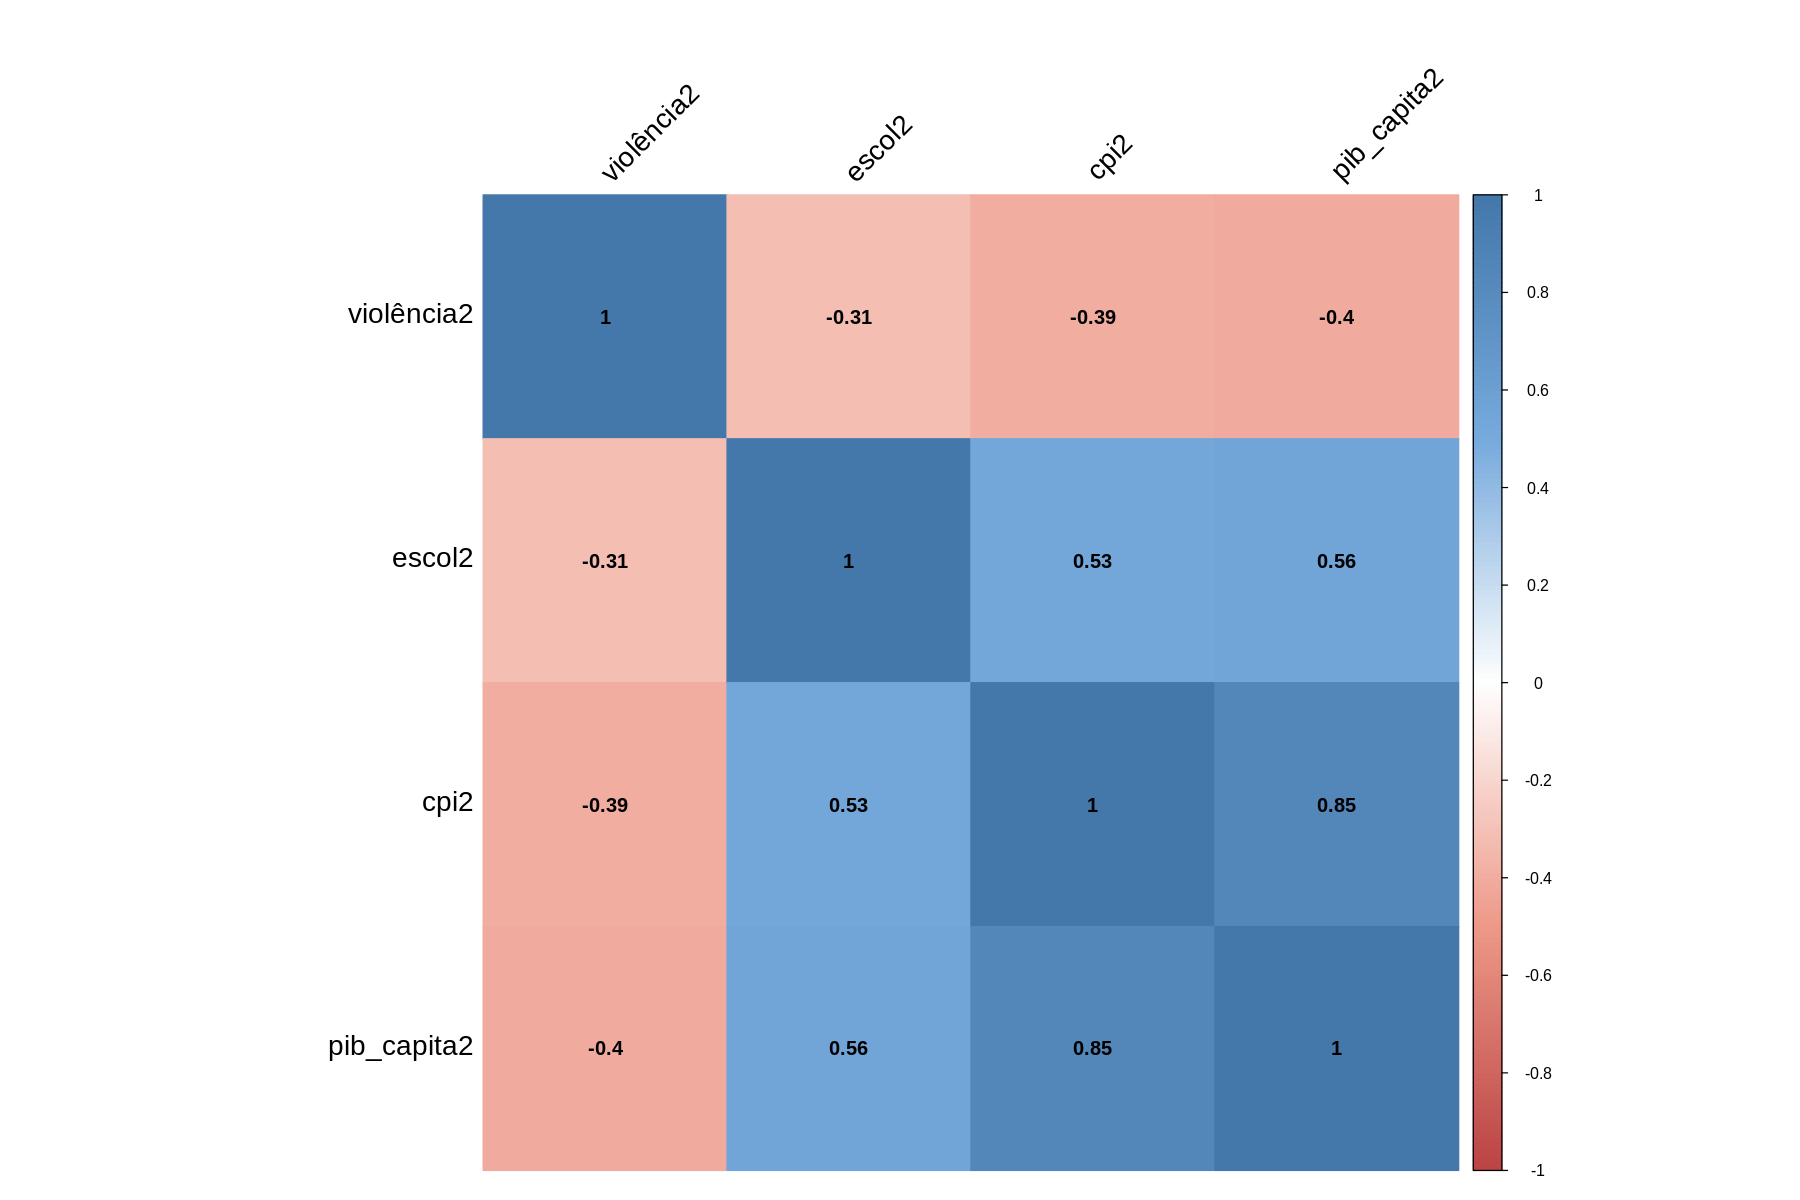

In [ ]:
library(ggplot2)
options(repr.plot.width=15, repr.plot.height=10) #Configuração da largura e altura dos plots
col2 <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
corrplot(corr_coef2, method="color", col=col(200),  
         order="hclust", 
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=45, tl.cex=1.4#Text label color and rotation
         )

Visualização das distribuições das variáveis, scatters, valores das correlações

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”


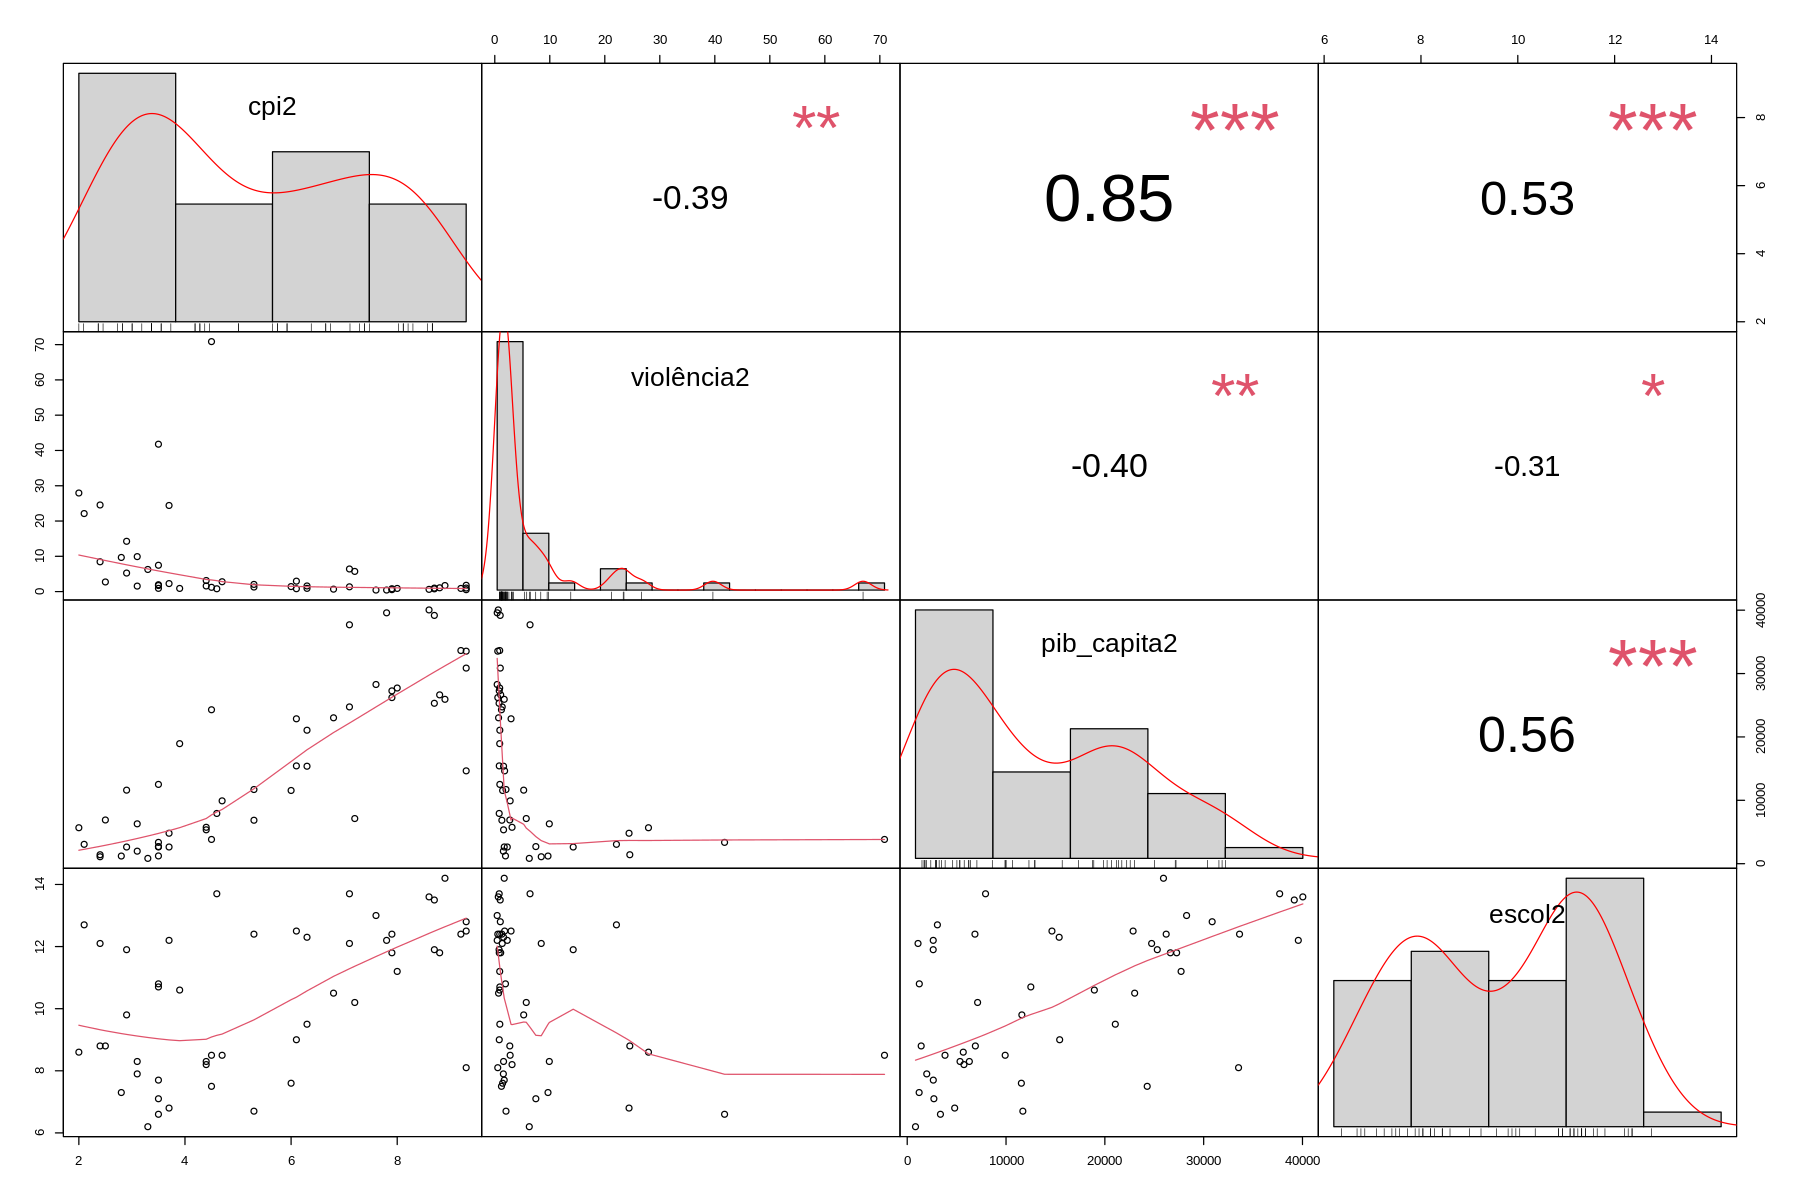

In [ ]:
chart.Correlation(base_indicador[,6:9 ], histogram = TRUE, pch = "+")

##Elaboração a Análise Fatorial Por Componentes Principais

Teste de esfericidade de Bartlett

In [ ]:
cortest.bartlett(base_indicador[,6:9])

R was not square, finding R from data



$chisq
[1] 86.48324

$p.value
[1] 1.626514e-16

$df
[1] 6

Elaboração da análise fatorial por componentes principais

In [ ]:
fatorial2 <- principal(base_indicador[,6:9],
                      nfactors = length(base_indicador[,6:9]),
                      rotate = "none",
                      scores = TRUE)
fatorial2

Principal Components Analysis
Call: principal(r = base_indicador[, 6:9], nfactors = length(base_indicador[, 
    6:9]), rotate = "none", scores = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
              PC1  PC2   PC3   PC4 h2       u2 com
cpi2         0.90 0.18 -0.29 -0.27  1 -2.2e-16 1.5
violência2  -0.61 0.79 -0.06  0.00  1  0.0e+00 1.9
pib_capita2  0.91 0.17 -0.26  0.28  1 -1.1e-15 1.4
escol2       0.75 0.23  0.62 -0.01  1  5.6e-16 2.1

                       PC1  PC2  PC3  PC4
SS loadings           2.57 0.74 0.54 0.15
Proportion Var        0.64 0.18 0.14 0.04
Cumulative Var        0.64 0.83 0.96 1.00
Proportion Explained  0.64 0.18 0.14 0.04
Cumulative Proportion 0.64 0.83 0.96 1.00

Mean item complexity =  1.7
Test of the hypothesis that 4 components are sufficient.

The root mean square of the residuals (RMSR) is  0 
 with the empirical chi square  0  with prob <  NA 

Fit based upon off diagonal values = 1

   Eigenvalues (autovalores)

In [ ]:
eigenvalues2 <- round(fatorial2$values, 5)
eigenvalues2

[1] 2.56597 0.73741 0.54310 0.15353

Soma dos eigenvalues = 4 (quantidade de variáveis na análise)

Também representa a quantidade máxima de possíveis fatores na análise

In [ ]:
round(sum(eigenvalues2), 2)

[1] 4

Identificação da variância compartilhada em cada fator

In [ ]:
variancia_compartilhada2 <- as.data.frame(fatorial2$Vaccounted) %>% 
  slice(1:3)
rownames(variancia_compartilhada2) <- c("Autovalores",
                                       "Prop. da Variância",
                                       "Prop. da Variância Acumulada")
variancia_compartilhada2

,PC1,PC2,PC3,PC4
,<dbl>,<dbl>,<dbl>,<dbl>
Autovalores,2.5659663,0.7374067,0.5430992,0.15352786
Prop. da Variância,0.6414916,0.1843517,0.1357748,0.03838197
Prop. da Variância Acumulada,0.6414916,0.8258432,0.9616180,1.00000000


Cálculo dos scores fatoriais

In [ ]:
scores_fatoriais2 <- as.data.frame(fatorial$weights)
scores_fatoriais2

,PC1,PC2,PC3,PC4
,<dbl>,<dbl>,<dbl>,<dbl>
cpi2,0.3503136,0.2384581,-0.5427533,-1.77404459
violência2,-0.2370977,1.0735601,-0.1032726,0.02236518
pib_capita2,0.3539465,0.2302620,-0.4770157,1.83304858
escol2,0.2924101,0.3060876,1.1438942,-0.07532688


Cálculo dos fatores propriamente ditos

In [ ]:
fatores2 <- as.data.frame(fatorial2$scores)

head(fatores2,n=5)

,PC1,PC2,PC3,PC4
,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.5341620,-0.5221064,0.4816934,1.42177201
2,1.0660136,0.2129445,-0.3133327,-0.98131251
3,0.9902887,0.1580023,-0.2542769,-0.08659229
4,0.8265205,0.1157320,0.1699686,0.13050896
5,-1.3467528,0.6714679,-1.0685965,-0.05567150


Coeficientes de correlação de Pearson para cada par de fatores (ortogonais)

In [ ]:
rho2 <- rcorr(as.matrix(fatores2), type="pearson")
round(rho2$r, 4)

,PC1,PC2,PC3,PC4
PC1,1,0,0,0
PC2,0,1,0,0
PC3,0,0,1,0
PC4,0,0,0,1


Cálculo das cargas fatoriais

In [ ]:
cargas_fatoriais2 <- as.data.frame(unclass(fatorial2$loadings))
cargas_fatoriais2

,PC1,PC2,PC3,PC4
,<dbl>,<dbl>,<dbl>,<dbl>
cpi2,0.8988930,0.1758406,-0.29476888,-0.272365276
violência2,-0.6083848,0.7916504,-0.05608728,0.003433678
pib_capita2,0.9082147,0.1697968,-0.25906682,0.281424032
escol2,0.7503144,0.2257111,0.62124800,-0.011564775


Cálculo das comunalidades

In [ ]:
comunalidades2 <- as.data.frame(unclass(fatorial2$communality)) %>%
  rename(comunalidades2 = 1)
round(comunalidades2, 3)

,comunalidades2
,<dbl>
cpi2,1
violência2,1
pib_capita2,1
escol2,1


Fatores extraídos a partir de autovalores maiores que 1

Definição da quantidade de fatores com eigenvalues maiores que 1:

In [ ]:
k2 <- sum(eigenvalues2 > 1)
print(k2)

[1] 1


Elaboração da análise fatorial por componentes principais

Com quantidade 'k' de fatores com eigenvalues maiores que 1

In [ ]:
fatorial2 <- principal(base_indicador[,6:9],
                      nfactors = k,
                      rotate = "none",
                      scores = TRUE)
fatorial2

Principal Components Analysis
Call: principal(r = base_indicador[, 6:9], nfactors = k, rotate = "none", 
    scores = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
              PC1   h2   u2 com
cpi2         0.90 0.81 0.19   1
violência2  -0.61 0.37 0.63   1
pib_capita2  0.91 0.82 0.18   1
escol2       0.75 0.56 0.44   1

                PC1
SS loadings    2.57
Proportion Var 0.64

Mean item complexity =  1
Test of the hypothesis that 1 component is sufficient.

The root mean square of the residuals (RMSR) is  0.13 
 with the empirical chi square  10.35  with prob <  0.0057 

Fit based upon off diagonal values = 0.94

Cálculo dos scores fatoriais

In [ ]:
scores_fatoriais2 <- as.data.frame(fatorial2$weights)
scores_fatoriais2

,PC1
,<dbl>
cpi2,0.3503136
violência2,-0.2370977
pib_capita2,0.3539465
escol2,0.2924101


Cálculo das comunalidades com apenas os 'k' ('k' = 2) primeiros fatores

In [ ]:
comunalidades2 <- as.data.frame(unclass(fatorial2$communality)) %>%
  rename(comunalidades = 1)
comunalidades2

,comunalidades
,<dbl>
cpi2,0.8080086
violência2,0.3701321
pib_capita2,0.8248540
escol2,0.5629717


Adicionando o fator extraído ao banco de dados original

In [ ]:
base_indicador <- bind_cols(base_indicador,
                            "fator_ano2" = fatores2$PC1)

## Comparação entre os dois anos

Comparação dos scores fatoriais

In [ ]:
compara_score <- round(cbind(scores_fatoriais1, scores_fatoriais2),3) %>% 
  rename(Fator_Ano1 = 1, Fator_Ano2 = 2)
rownames(compara_score) <- c("cpi",
                             "violência",
                             "pib_capita",
                             "escol")
compara_score

,Fator_Ano1,Fator_Ano2
,<dbl>,<dbl>
cpi,0.348,0.350
violência,-0.237,-0.237
pib_capita,0.352,0.354
escol,0.292,0.292


Comparando os países entre os dois anos

In [ ]:
base_indicador <- base_indicador %>% 
  arrange(desc(fator_ano1)) %>% 
  mutate(pos_ano1 = seq(fator_ano1)) %>% 
  arrange(desc(fator_ano2)) %>% 
  mutate(pos_ano2 = seq(fator_ano2))
base_indicador

país,cpi1,violência1,pib_capita1,escol1,cpi2,violência2,pib_capita2,escol2,fator_ano1,fator_ano2,pos_ano1,pos_ano2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
Norway,8.6,0.8763,39970.2930,13.5,8.6,0.6321,40034.8516,13.6,1.67935307,1.688465583,2,1
Switzerland,9.0,0.8976,38826.8438,13.4,8.7,0.9867,39170.4141,13.5,1.69234909,1.659356994,1,2
Sweden,9.2,1.0819,32631.1934,12.3,9.2,0.8965,33630.2461,12.4,1.40395512,1.438823125,4,3
Denmark,9.3,0.6282,30667.8242,12.8,9.3,1.0043,30860.1289,12.8,1.43267362,1.422529921,3,4
Japan,7.7,0.4763,39971.7891,12.1,7.8,0.4394,39578.0742,12.2,1.38063846,1.384800362,5,5
Canada,8.7,1.6049,25575.2168,14.1,8.9,1.7157,25933.2891,14.2,1.34297988,1.384361865,7,6
United States,7.5,6.1731,37329.6172,13.7,7.1,6.4100,37691.0273,13.7,1.37225227,1.302601936,6,7
United Kingdom,7.7,0.5014,28244.3379,13.0,7.6,0.4350,28272.4063,13.0,1.15602509,1.132062008,8,8
Netherlands,8.9,1.1445,26501.0449,11.7,8.8,1.0776,26634.8594,11.8,1.10857954,1.100703806,9,9
